#**Hands-On Activity 12 | Data Dashboard Taxonomies**





---



Name : <br>
Interno, Jerald San M. <br>
Galan, Irick Marvin <br>
Course Code and Title : CPE031 Visualizations and Data Analysis <br>
Date Submitted : 07/11/2025<br>
Instructor : Ma'am Sayo


---



**1. Objectives:**

This activity aims to demonstrate students’ ability to design, interpret, and evaluate data dashboards. Students will apply principles of effective data dashboards, understand data update mechanisms, explore user interaction features, and relate dashboards to their organizational functions.

**2. Intended Learning Outcomes (ILOs):**

By the end of this activity, students should be able to:

1. Identify the key principles that make data dashboards effective communication tools.

2. Explain how data updates, user interaction, and organizational function shape dashboard design.

3. Build an interactive data dashboard in Python using sample data to visualize multiple business metrics.

**3. Discussions:**

A data dashboard is a visual interface that displays key information and performance indicators in a concise and interactive manner. Dashboards consolidate multiple data sources to provide users with insights for decision-making and performance tracking.

Principles of Effective Dashboards:

Clarity and Simplicity: Visuals should be easy to read and interpret.

Real-Time or Dynamic Data: Dashboards often pull updated data automatically.

Interactivity: Users should be able to filter, sort, or drill down into specific metrics.

Action-Oriented Insights: The dashboard should guide users toward decisions or next steps.

Taxonomies of Data Dashboards:

Data Updates – Dashboards can show static (snapshot) or dynamic (real-time) data.

User Interaction – Some dashboards allow filtering, searching, and selecting parameters.

Organizational Function – Dashboards can serve strategic, analytical, or operational functions.

For example:

Strategic dashboards help top management monitor KPIs.

Analytical dashboards help analysts explore data trends.

Operational dashboards support real-time monitoring of systems and workflows.

**4. Procedures:**

In [1]:
!pip install plotly pandas

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [3]:
# Simulated company performance data
np.random.seed(42)
months = pd.date_range("2024-01-01", periods=12, freq="M")
regions = ["North", "South", "East", "West"]
products = ["Laptop", "Tablet", "Phone"]

data = {
    "Month": np.random.choice(months, 200),
    "Region": np.random.choice(regions, 200),
    "Product": np.random.choice(products, 200),
    "Sales": np.random.randint(5000, 20000, 200),
    "Profit": np.random.randint(500, 5000, 200)
}

df = pd.DataFrame(data)
df.head()

/tmp/ipython-input-3445195635.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  months = pd.date_range("2024-01-01", periods=12, freq="M")


,Month,Region,Product,Sales,Profit
0,2024-07-31,West,Laptop,15738,4012
1,2024-04-30,West,Laptop,13945,1756
2,2024-11-30,East,Laptop,7082,3876
3,2024-08-31,East,Phone,15966,3986
4,2024-05-31,South,Phone,16088,4084


In [4]:
# Aggregated views
sales_by_region = df.groupby("Region", as_index=False)["Sales"].sum()
sales_by_product = df.groupby("Product", as_index=False)["Sales"].sum()
sales_trend = df.groupby("Month", as_index=False)["Sales"].sum().sort_values("Month")

# Create dashboard layout
fig = make_subplots(rows=2, cols=2,
                    subplot_titles=("Sales by Region", "Sales by Product", "Monthly Sales Trend", "Profit vs Sales"),
                    specs=[[{"type": "bar"}, {"type": "pie"}],
                           [{"colspan": 2}, None]])

# Add charts
fig.add_trace(go.Bar(x=sales_by_region["Region"], y=sales_by_region["Sales"], name="Region Sales"), row=1, col=1)
fig.add_trace(go.Pie(labels=sales_by_product["Product"], values=sales_by_product["Sales"], name="Product Sales"), row=1, col=2)
fig.add_trace(go.Scatter(x=sales_trend["Month"], y=sales_trend["Sales"], mode="lines+markers", name="Monthly Trend"), row=2, col=1)

fig.update_layout(height=700, width=950, title_text="📊 Interactive Data Dashboard Example")
fig.show()

In [5]:
# Interactive dashboard: filterable by product
fig = px.bar(df, x="Region", y="Sales", color="Product", barmode="group",
             title="Interactive Dashboard: Sales by Region and Product",
             hover_data=["Profit"])
fig.show()

**Task 1:** Principles of Effective Data Dashboards

Create your own version of the dashboard above using a different dataset (e.g., student performance, store sales, or IoT sensor readings).
Ensure that your dashboard demonstrates:

Clarity and simplicity in layout

Appropriate chart types for your data

Use of color and labels to improve readability

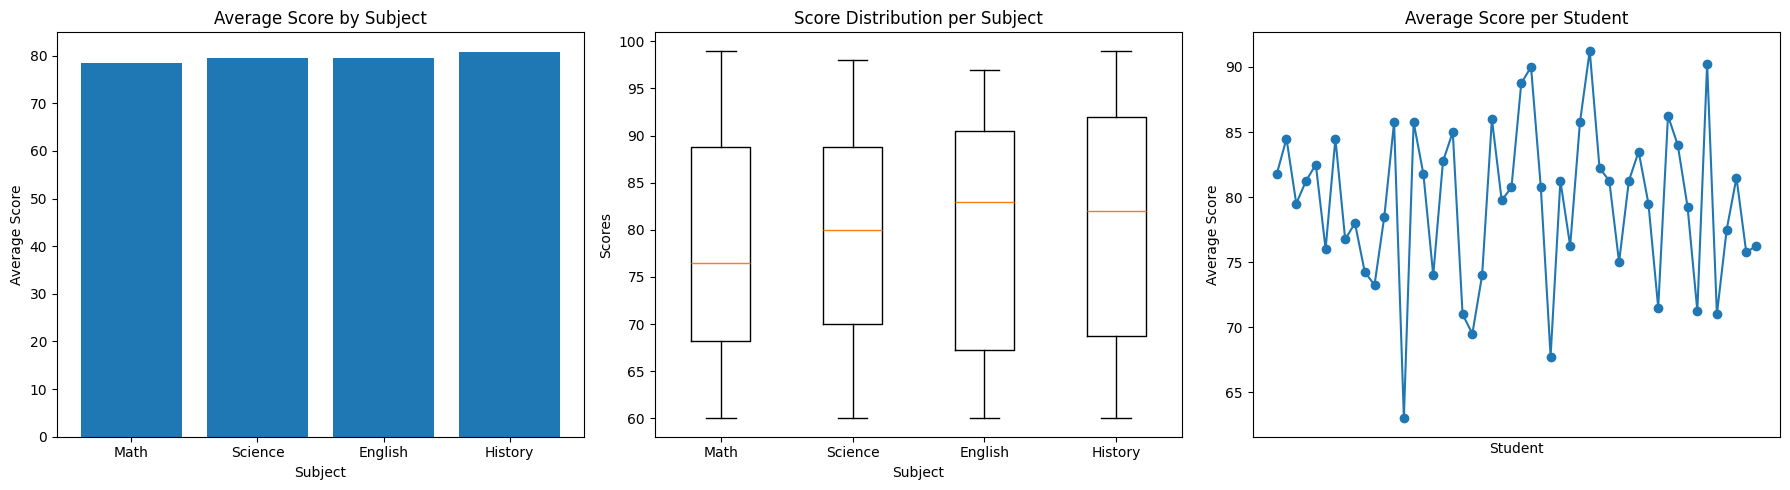

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Simulated student performance dataset
np.random.seed(42)
students = [f"Student_{i}" for i in range(1, 51)]
subjects = ["Math", "Science", "English", "History"]
grades = np.random.randint(60, 100, size=(50, 4))

df = pd.DataFrame(grades, columns=subjects)
df["Student"] = students

# Average score per subject
avg_scores = df[subjects].mean()

# Score distribution per subject
score_data = [df[subj].values for subj in subjects]

# Average score trend per student
avg_student = df[subjects].mean(axis=1)

# Create dashboard layout
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Bar Chart - Average Scores
axes[0].bar(subjects, avg_scores)
axes[0].set_title("Average Score by Subject")
axes[0].set_xlabel("Subject")
axes[0].set_ylabel("Average Score")

# Box Plot - Score Distribution (fixed here)
axes[1].boxplot(score_data, tick_labels=subjects)
axes[1].set_title("Score Distribution per Subject")
axes[1].set_xlabel("Subject")
axes[1].set_ylabel("Scores")

# Line Chart - Individual Trend
axes[2].plot(students, avg_student, marker='o')
axes[2].set_title("Average Score per Student")
axes[2].set_xlabel("Student")
axes[2].set_ylabel("Average Score")
axes[2].tick_params(axis='x', which='both', bottom=False, labelbottom=False)

plt.tight_layout()
plt.show()


**Task 2:** Data Dashboard Taxonomies

Add interactivity features such as:

A dropdown menu to select regions or products

A dynamic update (simulating real-time data) using Python’s update functions

Explain how your dashboard fits into:

Data Update Type (Static, Scheduled, or Real-Time)

User Interaction (Filter, Drilldown, etc.)

Organizational Function (Strategic, Analytical, Operational)

Dropdown(description='Product:', options=('Apple', 'Banana', 'Orange', 'Mango'), value='Apple')

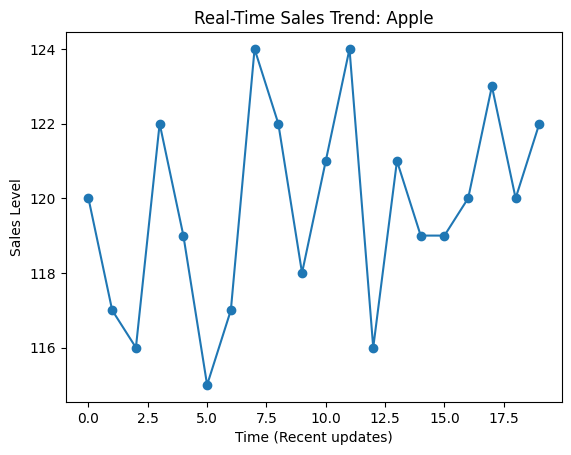

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation
from IPython.display import HTML, display
import ipywidgets as widgets

# Increase allowed animation memory
plt.rcParams['animation.embed_limit'] = 100  # MB

# Dataset
data = {
    "Product": ["Apple", "Banana", "Orange", "Mango"],
    "Sales": [120, 90, 150, 100]
}

df = pd.DataFrame(data)

product_dropdown = widgets.Dropdown(
    options=df["Product"].unique(),
    description="Product:",
    value="Apple"
)

display(product_dropdown)

# Plot setup
fig, ax = plt.subplots()
sales_history = []

def update(frame):
    ax.clear()
    selected_product = product_dropdown.value

    new_sale = df.loc[df["Product"] == selected_product, "Sales"].values[0] + np.random.randint(-5, 6)
    sales_history.append(new_sale)

    # Keep only last 20 points to avoid memory overflow
    if len(sales_history) > 20:
        sales_history.pop(0)

    ax.plot(sales_history, marker="o")
    ax.set_title(f"Real-Time Sales Trend: {selected_product}")
    ax.set_xlabel("Time (Recent updates)")
    ax.set_ylabel("Sales Level")

ani = FuncAnimation(fig, update, interval=1000, cache_frame_data=False, save_count=20)

display(HTML(ani.to_jshtml()))




---


**5. Supplementary Activity:**

Create a mini dashboard project that tracks student grades or attendance:

1. Include 3 visualizations (e.g., average grades by subject, attendance by week, and performance trend).

2. Add at least one interactive feature (dropdown or slider).

3. Explain how your dashboard helps an instructor or department make data-driven decisions.

In [26]:
!pip install pandas plotly

import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

# Create Dataset
np.random.seed(42)
students = [f"Student_{i}" for i in range(1, 21)]
subjects = ["Math", "Science", "English"]
weeks = [f"Week {i}" for i in range(1, 6)]

# Student Grades Data (60–100)
grades = pd.DataFrame({
    "Student": np.repeat(students, len(subjects)),
    "Subject": subjects * len(students),
    "Grade": np.random.randint(60, 101, len(students) * len(subjects))
})

# Attendance Data (present = 1, absent = 0)
attendance = pd.DataFrame({
    "Week": weeks,
    "Attendance Rate": np.random.uniform(0.6, 1.0, len(weeks))
})

# Visualization 1: Average Grade by Subject
avg_subject = grades.groupby("Subject", as_index=False)["Grade"].mean()

fig1 = px.bar(avg_subject, x="Subject", y="Grade",
              title="Average Grades by Subject",
              text="Grade")
fig1.update_traces(textposition="outside")
fig1.show()

# Visualization 2: Attendance Trend
fig2 = px.line(attendance, x="Week", y="Attendance Rate",
               title="Attendance Rate per Week", markers=True)
fig2.update_yaxes(range=[0,1])
fig2.show()

# Visualization 3: Interactive Performance Trend (Fixed Dropdown)

fig3 = go.Figure()

# Add one trace per student
for student in students:
    student_data = grades[grades["Student"] == student]
    fig3.add_trace(go.Scatter(
        x=student_data["Subject"],
        y=student_data["Grade"],
        mode="lines+markers",
        name=student,
        visible=True if student == "Student_1" else False  # Show Student_1 first
    ))

# Create Dropdown Menu
fig3.update_layout(
    title="Student Performance Trend (Select Student)",
    updatemenus=[
        dict(
            buttons=[
                dict(
                    label=student,
                    method="update",
                    args=[{"visible": [s == student for s in students]}]
                )
                for student in students
            ],
            direction="down",
            x=1.25,
            xanchor="left",
            y=1,
            yanchor="top"
        )
    ]
)

fig3.show()


**6. Conclusion/Learnings/Analysis:**

I gained a lot of knowledge from this exercise, such as creating a little dashboard project that allows me to see student attendance and performance in a way that facilitates well-informed academic decision-making.  Both general analysis and individual-level evaluation were made possible by the use of bar charts, line graphs, and an interactive student performance trend.  The dashboard made it simpler to see attendance trends over time, track each student's development, and determine which subjects children excel in or struggle with.  By enabling teachers to swiftly shift their attention between pupils, the interactive dropdown feature further illustrated how data dashboards can adjust to the demands of users.  All things considered, this dashboard demonstrates how visual data tools can enhance planning, monitoring, and assessment in a learning environment.